### 工作原理:
    穷举法:
        最近邻居做预测 -> 计算预测数据点与训练集中所有样本的欧式距离  然后计算出最小K的距离  (样本少 特征少)
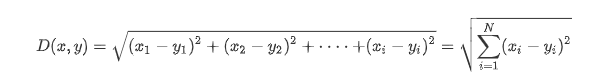
    
    K-D树算法:
        (样本多 特征多)
        二叉树 表示对K维空间的一个划分 进行快速检索
    算法原理:
        二维平面数据为例: (2, 3), (5, 4), (9, 6), (4, 7), (8, 1), (7, 2)
             预测 (2, 4.5)
        六个数据中谁离预测数据是最近的?
        穷举:计算欧式进来  距离最小的点
        
        K-D:
            1. 构建一个树, 按照X轴分割数据
            点集合在X维度从小到大 (2, 3), (4, 7) , (5, 4), (7, 2), (8, 1), (9, 6)
            (7, 2)分割数据 (2, 3), (4, 7), (5, 4)左边节点 -> 左子树 -> (2, 3), (4, 7), (5, 4)y轴排序
            右子树 
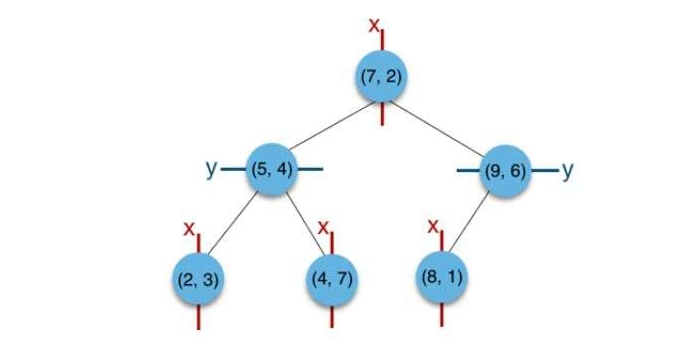

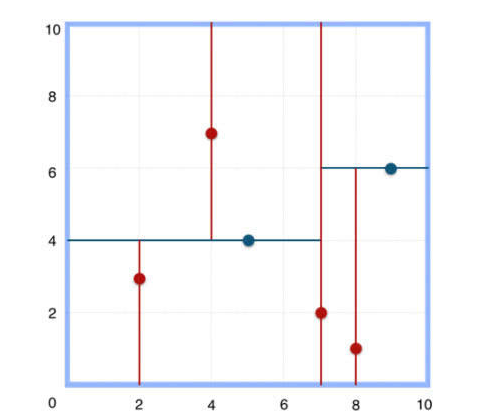
K值交叉验证确定K值  K一般低于训练样本数据的平方根

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer

In [2]:
dataCancer = load_breast_cancer()

In [3]:
dataCancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
data = dataCancer.data[:, 0:2]

In [5]:
target = dataCancer.target

In [6]:
data

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

In [7]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
model = KNeighborsClassifier(n_neighbors=3, algorithm='auto') # 建模方式 auto brute kd_tree..
model.fit(data, target)

KNeighborsClassifier(n_neighbors=3)

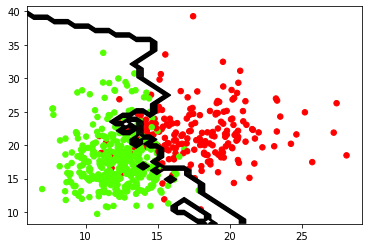

In [14]:
plt.scatter(data[:, 0], data[:, 1], c=target, s=30, cmap=plt.cm.prism)
axis = plt.gca()

x_limit = axis.get_xlim()
y_limit = axis.get_ylim()

x = np.linspace(x_limit[0], x_limit[1])
y = np.linspace(y_limit[0], y_limit[1])

X, Y = np.meshgrid(x, y) # 分界线
xy = np.c_[X.ravel(), Y.ravel()]

# 模型 进行分类器预测
boundary = model.predict(xy)
boundary = boundary.reshape(X.shape)

axis.contour(X, Y, boundary, colors='k')
plt.show()

### KNN开发流程:
    收集数据
    准备数据
    分析数据
    训练算法
    测试算法
    使用算法
  精度高 对异常值不敏感 -> 缺点 计算复杂度高 空间复杂度高
  数值型

In [15]:
from numpy import *
import operator # 运算符
from os import listdir
from collections import Counter

In [16]:
def createDataSet():
    group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [33]:
def classify0(inX, dataSet, labels, k):
    '''
    inX: 分类输入的向量  Dataset: 训练样本 labels:标签  k:最近邻数目
    '''
    # 第一种方法
    # 欧式距离: 点与点之间距离 
    # N行: 同一个点到DataSet N个点的距离 ->(A1 - A2)^2 + (B1 - B2)^2 + (C1 - C2) ^ 2
#     dist = np.sum((inX - dataSet) ** 2, axis=1)**0.5 # 计算距离
#     # 对距离进行排序 -> 返回索引  k个索引 [0:k] 
#     k_labels = [labels[index] for index in dist.argsort()[0:k]] # k个最近标签
#     label = Counter(k_labels).most_common(1)[0][0]
#     return label   

    # 第二种方式
    dataSetSize = dataSet.shape[0]
    # 取平分
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    # 矩阵每行相加
    sqDistances = sqDiffMat.sum(axis=1)
    # 开方
    distances = sqDistances ** 0.5
    # 根据距离从小到大 排序
    sortedDisIndicies = distances.argsort()
    
    classCount = {}
    for i in range(k):
        # 找到样本类型
        voteIlabel = labels[sortedDisIndicies[i]]
        # 在字典中类型加1
        # 字典get l = {5:2, 3:4} = l.get(3, 0) => 4
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    maxclassCount = max(classCount, key=classCount.get)
    print(classCount)
    return maxclassCount

In [23]:
group, labels = createDataSet()

In [19]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [20]:
labels

['A', 'A', 'B', 'B']

In [38]:
classify0([0.3, 0.2], group, labels, 3) # 输入 向量 01, 01 分类 -> B标签

{'B': 2, 'A': 1}


'B'

In [39]:
def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)

In [81]:
def KNN(trainingSet, testinStance, k):
    distance = {}
    sort = {}
    
    length = testinStance.shape[1]
    
    # 计算每行训练数据与测试数据之间的欧式距离
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testinStance, trainingSet.iloc[x], length)
        distance[x] = dist[0]
    
    sorted_d = sorted(distance.items(), key = operator.itemgetter(1)) # 根据距离进行排序
    
    neighbors = []
    # k 近邻元素
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    
    classVotes = {}
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1] # 频率
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return (sortedVotes, neighbors)
        
        

In [89]:
testSet = [[0.7, 0.3, 0.4, 0.5]]
test = pd.DataFrame(testSet)

In [83]:
data = pd.read_csv('./iris.csv')

In [90]:
k = 50
result, neigh = KNN(data, test, k)

In [91]:
result

[('Iris-setosa', 50)]

In [77]:
result

[('Iris-setosa', 50)]

In [74]:
neigh

[5,
 6,
 7,
 4,
 8,
 3,
 9,
 2,
 10,
 11,
 1,
 0,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [41]:
import pandas as pd

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(data.iloc[:, 0:4], data['Species'])

KNeighborsClassifier(n_neighbors=3)

In [94]:
neigh.predict(test)

array(['Iris-setosa'], dtype=object)

In [95]:
neigh.kneighbors(test)

(array([[5.51543289, 5.75586657, 5.79223618]]),
 array([[1, 2, 0]], dtype=int64))

In [98]:
print(neigh.score)

<bound method ClassifierMixin.score of KNeighborsClassifier(n_neighbors=3)>
